#  Введение в 🤗 Transformers

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:

* https://huggingface.co/docs/transformers/v4.38.2/en/pipeline_tutorial
* https://huggingface.co/docs/transformers/v4.38.2/en/main_classes/pipelines#transformers.AutomaticSpeechRecognitionPipeline
* https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fstackoverflow.com%2Fa%2F51506028
* https://stackoverflow.com/questions/37435369/how-to-draw-a-rectangle-on-image
* https://huggingface.co/docs/transformers/v4.38.2/en/autoclass_tutorial#autoimageprocessor
* https://huggingface.co/docs/transformers/v4.38.2/en/model_doc/auto#transformers.AutoModelForObjectDetection
* https://huggingface.co/docs/transformers/training
* https://huggingface.co/docs/datasets/main/en/repository_structure
* https://huggingface.co/docs/datasets/main/en/package_reference/loading_methods#datasets.load_dataset
* https://huggingface.co/docs/transformers/v4.35.2/en/training#prepare-a-dataset
* https://huggingface.co/docs/datasets/process
* https://huggingface.co/docs/evaluate/index
* https://huggingface.co/docs/transformers/main_classes/trainer
* https://huggingface.co/docs/transformers/v4.35.2/en/main_classes/trainer#transformers.TrainingArguments

## Задачи для совместного разбора

In [ ]:
!pip install datasets evaluate accelerate

1\. Обсудите основные возможности и экосистему пакета 🤗 Transformers на примере задачи поиска ответа на вопрос в тексте.

In [2]:
from transformers import pipeline

In [3]:
text = """
The debate between cats and dogs has raged on for centuries, dividing pet lovers into passionate camps.
Cats, with their independent nature and mysterious charm, appeal to those seeking companionship without constant demands.
Dogs, on the other hand, offer unwavering loyalty and boundless enthusiasm, making them beloved companions
for those craving constant affection and activity.
"""

In [4]:
question = "Why do cats attract attention?"

In [5]:
model_id = "distilbert/distilbert-base-cased-distilled-squad"
answerer_pipeline = pipeline("question-answering", model=model_id)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [6]:
answerer_pipeline(
    question=question,
    context=text
)

{'score': 0.25906872749328613,
 'start': 116,
 'end': 161,
 'answer': 'their independent nature and mysterious charm'}

In [7]:
answerer_pipeline.tokenizer.__class__.__name__

'DistilBertTokenizerFast'

In [8]:
answerer_pipeline.model.__class__.__name__

'DistilBertForQuestionAnswering'

In [9]:
from transformers import DistilBertTokenizerFast, DistilBertForQuestionAnswering
from transformers import AutoModel, AutoTokenizer, AutoModelForQuestionAnswering

In [10]:
# tokenizer = DistilBertTokenizerFast.from_pretrained(model_id)
# model = DistilBertForQuestionAnswering.from_pretrained(model_id)

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForQuestionAnswering.from_pretrained(model_id)

In [11]:
tokenizer.__class__.__name__

'DistilBertTokenizerFast'

In [12]:
inputs = tokenizer(question, text, return_tensors="pt")
inputs

{'input_ids': tensor([[  101,  2009,  1202, 11771,  9781,  2209,   136,   102,  1109,  5655,
          1206, 11771,  1105,  6363,  1144,  8045,  1181,  1113,  1111,  3944,
           117, 18699, 11109, 12977,  1154, 14472,  7869,   119, 17408,   117,
          1114,  1147,  2457,  2731,  1105,  8198, 11967,   117,  5767,  1106,
          1343,  5788, 12994,  3157,  1443,  4836,  7252,   119, 16406,   117,
          1113,  1103,  1168,  1289,   117,  2906,  8362, 17159,  3384, 10075,
          1105,  4930,  2008, 12430,   117,  1543,  1172, 12915, 12994,  1111,
          1343,   172,  1611,  3970,  4836, 12721,  1105,  3246,   119,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]])}

In [13]:
outputs = model(**inputs)
outputs

QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[ -7.3466,  -8.4334, -10.1661, -10.2328,  -9.8446, -10.4487,  -8.8612,
          -8.5093,  -4.6390,  -5.1207,  -8.7647,  -6.4860, -10.0330,  -7.8754,
          -8.7065,  -8.2367, -10.4912,  -9.7546,  -9.5640,  -9.4665,  -9.1847,
          -6.0775,  -5.7577,  -8.1511,  -9.5241,  -6.0960,  -7.9140,  -6.8508,
          -0.5975,  -4.7046,   0.0829,   2.2341,   2.0374,  -2.5162,  -5.2183,
           0.9769,  -1.5514,  -4.6186,  -1.5886,  -5.4501,  -1.6530,  -1.5503,
          -1.4312,  -6.4117,  -1.0940,  -3.0208,  -4.6920,  -6.1496,  -1.3536,
          -9.0775,  -7.7131,  -9.4301,  -9.7439, -10.1375,  -6.0933,  -2.8406,
          -2.0197,  -7.4151,  -7.5488,  -2.3198,  -8.0172,  -3.6072,  -8.1854,
          -4.1657,  -7.2482,  -2.6937,  -6.5313,  -4.6578,  -6.8350,  -5.5111,
          -3.7698,  -3.4284,  -8.7686,  -7.9149,  -3.7951,  -4.7180,  -9.9935,
          -6.3157,  -8.4364,  -8.5093]], grad_fn=<CloneBackward0>), end_logits

In [14]:
outputs

QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[ -7.3466,  -8.4334, -10.1661, -10.2328,  -9.8446, -10.4487,  -8.8612,
          -8.5093,  -4.6390,  -5.1207,  -8.7647,  -6.4860, -10.0330,  -7.8754,
          -8.7065,  -8.2367, -10.4912,  -9.7546,  -9.5640,  -9.4665,  -9.1847,
          -6.0775,  -5.7577,  -8.1511,  -9.5241,  -6.0960,  -7.9140,  -6.8508,
          -0.5975,  -4.7046,   0.0829,   2.2341,   2.0374,  -2.5162,  -5.2183,
           0.9769,  -1.5514,  -4.6186,  -1.5886,  -5.4501,  -1.6530,  -1.5503,
          -1.4312,  -6.4117,  -1.0940,  -3.0208,  -4.6920,  -6.1496,  -1.3536,
          -9.0775,  -7.7131,  -9.4301,  -9.7439, -10.1375,  -6.0933,  -2.8406,
          -2.0197,  -7.4151,  -7.5488,  -2.3198,  -8.0172,  -3.6072,  -8.1854,
          -4.1657,  -7.2482,  -2.6937,  -6.5313,  -4.6578,  -6.8350,  -5.5111,
          -3.7698,  -3.4284,  -8.7686,  -7.9149,  -3.7951,  -4.7180,  -9.9935,
          -6.3157,  -8.4364,  -8.5093]], grad_fn=<CloneBackward0>), end_logits

In [15]:
outputs.start_logits.argmax(), outputs.end_logits.argmax()

(tensor(31), tensor(36))

In [16]:
inputs["input_ids"][0, 31:36+1]

tensor([ 1147,  2457,  2731,  1105,  8198, 11967])

In [17]:
tokenizer.decode(inputs["input_ids"][0, 31:36+1])

'their independent nature and mysterious charm'

2\. Обсудите основные шаги по дообучению моделей из экосистемы 🤗 Transformers.

In [18]:
from datasets import load_dataset

In [19]:
dataset = load_dataset("dair-ai/emotion")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [20]:
dataset["train"][0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [21]:
model_id = "blanchefort/rubert-base-cased-sentiment-rusentiment"

In [22]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_id)

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


tokenized_datasets = dataset.map(tokenize_function, batched=True)

tokenizer_config.json:   0%|          | 0.00/495 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/952 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [23]:
tokenized_datasets["train"][0]

{'text': 'i didnt feel humiliated',
 'label': 0,
 'input_ids': [101, 248, 89104, 271, 74994, 60528, 14296, 16035, 102],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [24]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    model_id,
    num_labels=2,
    ignore_mismatched_sizes=True
)

model.safetensors:   0%|          | 0.00/711M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at blanchefort/rubert-base-cased-sentiment-rusentiment and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
from transformers import TrainingArguments
import numpy as np
import evaluate
from transformers import TrainingArguments, Trainer

In [26]:
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)


training_args = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch"
)

In [27]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    compute_metrics=compute_metrics,
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
trainer.train()

## Задачи для самостоятельного решения

1\. Запишите небольшой аудиофрагмент в формате wav на русском языке. Для записи вы можете воспользоваться любым устройством: мобильным телефоном, веб-приложением (например, [этим](https://vocalremover.org/ru/voice-recorder)) и т.д. Если нет возможности записать аудио, можете найти любую запись на русском языке в интернете.

Среди предобученных моделей найдите модель для автоматического распознавания текста на русском языке. Протестируйте данную модель вашей аудиозаписи, используя `transformers.pipeline`. Выведите результаты работы на экран.

In [88]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration
from datasets import load_dataset

In [89]:
model_id = "openai/whisper-tiny"
answerer_pipeline = pipeline(
    "automatic-speech-recognition", model=model_id, return_timestamps='word'
)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [90]:
answ = answerer_pipeline(inputs='/content/recognition_test.wav')
answ['text'].strip()

Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


'Онлайн диктор для синтезоречи, обеспечит вам возможность преобразовать текст в убедительную аудиодорожку.'

2\. `transformers.pipeline` позволяет передавать дополнительные, специфичные для решаемой задачи, аргументы. В случае распознавания текста из аудио мы можем попросить `pipeline` вернуть время произнесения каждого из токенов (звука или слова). Создайте `pipeline` таким образом, чтобы вместе с результатом возвращалось время произнесения каждого слова. Выведите результат на экран.

Визуализируйте распознанные слова, адаптировав [этот пример](https://stackoverflow.com/a/51506028). Для этого сначала найдите множество уникальных слов, которые были произнесены, и присвойте каждому из них номер и собственный цвет.

In [128]:
import matplotlib
import matplotlib.pyplot as plt

In [91]:
answ['chunks']

[{'text': ' Онлайн', 'timestamp': (0.12, 0.66)},
 {'text': ' диктор', 'timestamp': (0.66, 1.02)},
 {'text': ' для', 'timestamp': (1.02, 1.26)},
 {'text': ' синтезоречи,', 'timestamp': (1.26, 2.46)},
 {'text': ' обеспечит', 'timestamp': (2.46, 2.96)},
 {'text': ' вам', 'timestamp': (2.96, 3.12)},
 {'text': ' возможность', 'timestamp': (3.12, 3.62)},
 {'text': ' преобразовать', 'timestamp': (3.62, 4.44)},
 {'text': ' текст', 'timestamp': (4.44, 4.72)},
 {'text': ' в', 'timestamp': (4.72, 4.92)},
 {'text': ' убедительную', 'timestamp': (4.92, 5.52)},
 {'text': ' аудиодорожку.', 'timestamp': (5.52, 8.58)}]

In [129]:
step = 20

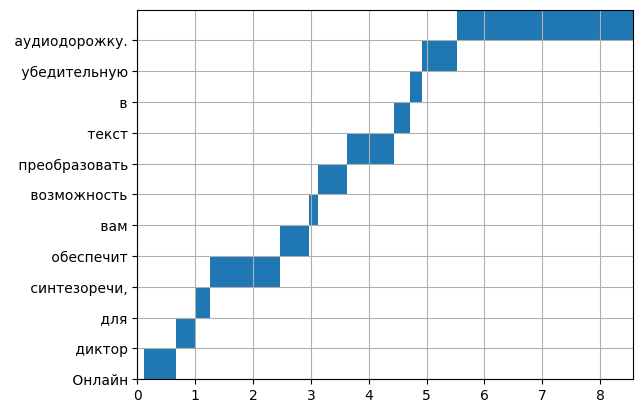

In [152]:
text_all = [i['text'] for i in answ['chunks']]

fig, ax = plt.subplots()
for n, i in enumerate(answ['chunks']):
    ax.add_patch(
        matplotlib.patches.Rectangle(
            (i['timestamp'][0], n*step),
            i['timestamp'][1]-i['timestamp'][0],
            step
        )
    )

plt.xlim(0, answ['chunks'][-1]['timestamp'][1])
plt.ylim(0, len(text_all)*step)
plt.grid(True)
plt.yticks(list(range(0, len(text_all)*step, step)), text_all)
plt.show()

3\. Разбейте данные из файла `reviews_polarity_small.csv` на обучающее и валидационное множество в соотношении 80 на 20. Создайте папку `reviews_polarity_dataset` и сохраните в нее полученные фрагменты данных под названием `train.csv` и `test.csv`. Создайте объект `datasets.Dataset`, используя функцию `load_dataset`.

Токенизируйте строки при помощи токенизатора, соответствующего модели `rubert-base-cased-sentiment`. Удалите из датасета поле `text` после токенизации, замените поле `class` на `labels` и приведите данные к тензорам `torch`.

4\. Создайте модель при помощи класса `AutoModelForSequenceClassification`, заменив голову модели в соответствии с задачей бинарной классификации. Используя `transformers.Trainer`, настройте модель для решения задачи бинарной классификации. При настройке `Trainer` укажите количество эпох, равное 5. Во время обучения выводите на экран значение функции потерь на обучающем множестве и f1 на валидационном множестве.  